## Check CUDA version

In [1]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## Install specific version of CUDA

In [2]:
%cd /usr/local/
!tar -xzvf "/content/drive/My Drive/YOLOv4/cudnn-10.1-linux-x64-v7.6.5.32 (1).tgz"

!chmod a+r /usr/local/cuda/include/cudnn.h
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

%cd /content/

/usr/local
tar (child): /content/drive/My Drive/YOLOv4/cudnn-10.1-linux-x64-v7.6.5.32 (1).tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
chmod: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory
cat: /usr/local/cuda/include/cudnn.h: No such file or directory
/content


## Check OpenCV version

In [3]:
import cv2
cv2.__version__

'4.1.2'

## Check GPU version

In [4]:
!nvidia-smi

Mon Jun 13 21:25:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Final check for CUDA version

In [5]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## Kaggle API connect, Dataset download and unzip

In [6]:
! pip install kaggle
! mkdir ~/.kaggle #
# ! cp /content/drive/MyDrive/AIML_Research_Projects_&_Publication/4_Leukemia_March_2022/Codes/kaggle.json
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Download Dataset
! kaggle datasets download mehradaria/leukemia

# Unzip
! unzip leukemia.zip

Streaming output truncated to the last 5000 lines.
  inflating: Original/Pre/WBC-Malignant-Pre-024.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-025.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-026.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-027.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-028.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-029.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-030.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-031.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-032.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-033.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-034.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-035.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-036.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-037.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-038.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-039.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-040.jpg  
  inflating: Original/Pre/WBC-M

## Initial Dependencies

In [7]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import os #file operation
import math
import shutil #Move files one directory to others
import glob

In [8]:
# Count the number of images in the respective classes
def ClassFreq(ROOT_DIR):
  # ROOT_DIR = ""
  number_of_images = {}

  # os.listdir() returns the elements on the specific folder
  for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

  # List of images according to the subdirectory
  # number_of_images.items()

  # Count class   #add len() in above loop
  print(number_of_images.items())

ClassFreq("/content/Original")

dict_items([('Benign', 504), ('Pre', 963), ('Early', 985), ('Pro', 804)])


In [9]:
os.listdir("/content/Original")

['Benign', 'Pre', 'Early', 'Pro']

## Dataset Splitting

#### Training: 70%, Validation: 15%, Testing: 15%

In [10]:
# shutil.rmtree("/content/train") 
# shutil.rmtree("/content/test")
# shutil.rmtree("/content/val")

In [11]:
ROOT_DIR = "/content/Original"
number_of_images = {}
# os.listdir() returns the elements on the specific folder
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
print(number_of_images.items())

# Creates directory for train, test and validation set
def dataFolder(path, split):
  # Create separate folders for Training, Validation and Testing
  if not os.path.exists("./"+path): # When <path> directory is not available in the root directory
    os.mkdir("./"+path)             # make directory

    for dir in os.listdir(ROOT_DIR): #For the classes in the Root directory
      os.makedirs("./"+path+"/"+dir)      # create new directoris
      
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(split*number_of_images[dir])-5), replace = False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./"+path, dir)
        shutil.copy(O,D)
        os.remove(O)
        
  else:
    print(f"{path} directory already exists")

  print(f"{path} directory has been created")


#Split Dataset and create directory
dataFolder("train",0.7)
dataFolder("val",0.15)
dataFolder("test",0.15)


#Show data frequency
ClassFreq("/content/train")
ClassFreq("/content/val")
ClassFreq("/content/test")


dict_items([('Benign', 504), ('Pre', 963), ('Early', 985), ('Pro', 804)])
train directory has been created
val directory has been created
test directory has been created
dict_items([('Benign', 347), ('Pre', 669), ('Early', 684), ('Pro', 557)])
dict_items([('Benign', 70), ('Pre', 139), ('Early', 142), ('Pro', 115)])
dict_items([('Benign', 70), ('Pre', 139), ('Early', 142), ('Pro', 115)])


In [12]:
#Count remaining Images
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
print(number_of_images.items())

dict_items([('Benign', 17), ('Pre', 16), ('Early', 17), ('Pro', 17)])


# Building CNN model from scrach

In [13]:
# import keras
# from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
# from keras.models import Sequential
# from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [14]:
# # CNN Model
# model = Sequential()

# model.add(Conv2D(filters = 16, kernel_size = (3,3), activation =  "relu", input_shape = (224,224,3), padding="same"))

# model.add(Conv2D(filters = 36, kernel_size = (3,3), activation =  "relu"))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 64, kernel_size = (3,3), activation =  "relu"))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 128, kernel_size = (3,3), activation =  "relu"))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Dropout(rate=0.25))

# model.add(Flatten())
# model.add(Dense(units=64, activation="relu"))
# model.add(Dropout(rate=0.25))

# model.add(Dense(units=4, activation="softmax"))

# model.summary()

# model.compile(optimizer = "adam", loss= keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

# Preprocessing: Preparing Image Data Generator

In [16]:
import keras
from keras.preprocessing.image import ImageDataGenerator
def preprocessingImages(path):
  """
  Input: path
  Output: Generated Data
  """
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range=0.2,preprocessing_function=preprocess_input, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size = 32,  class_mode= "categorical")
  train_step = image.n//32

  return image, train_step

In [17]:
train_path = "/content/train"
test_path = "/content/test"
val_path = "/content/val"

train_data, train_step = preprocessingImages(train_path)

Found 2257 images belonging to 4 classes.


In [18]:
def ScaleImages(path):
  """
  Input: path
  Output: Generated Data
  """
  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size = 32, class_mode= "categorical")
  steps = image.n//32
  return image, steps

val_data, val_steps = ScaleImages(val_path)
test_data, test_steps = ScaleImages(test_path)

Found 466 images belonging to 4 classes.
Found 466 images belonging to 4 classes.


In [19]:
# Show the labels
train_data.class_indices

{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}

In [20]:
print(test_data.class_indices)
print(val_data.class_indices)

{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}
{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}


# model building

In [24]:
patience = 7
from keras.callbacks import ModelCheckpoint, EarlyStopping


### Mobile Net

In [25]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# mobilenet_model = MobileNet(input_shape=(224,224,3), 
#                             include_top=False)
# for layer in mobilenet_model.layers:
#   layer.trainable = False

# X= Flatten()(mobilenet_model.output)
# X= Dense(units=4, activation="softmax")(X)

# mobilenet_final_model = Model(mobilenet_model.input, X)
# #  Call Back


# # Model Checkpoint
# mc = ModelCheckpoint(filepath="mobilenet.h5", monitor="val_accuracy", verbose=1, save_best_only = True)

# # Early Stopping
# es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience= patience, verbose=1)

# cb = [mc,es]
# mobilenet_final_model .compile(optimizer="rmsprop", loss=keras.losses.categorical_crossentropy, metrics = ["accuracy"])
# mobile_hist = mobilenet_final_model.fit_generator(train_data,
#                            steps_per_epoch=train_step,
#                            epochs = 50,
#                            validation_data = val_data,
#                            validation_steps=val_steps,
#                            callbacks=cb)

### ResNet50

In [37]:
from keras.applications.resnet import ResNet50
resnet_model = ResNet50(input_shape=(224,224,3),
                            include_top=False)
for layer in resnet_model.layers:
  layer.trainable = False

X= Flatten()(resnet_model.output)
X= Dense(units=4, activation="softmax")(X)

resnet_final_model = Model(resnet_model.input, X)
#  Call Back


# Model Checkpoint
mc = ModelCheckpoint(filepath="resnet.h5", monitor="val_accuracy", verbose=1, save_best_only = True)

# Early Stopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience= patience, verbose=1)

cb = [mc,es]
resnet_final_model .compile(optimizer="rmsprop", loss=keras.losses.categorical_crossentropy, metrics = ["accuracy"])
resnet_hist = resnet_final_model.fit_generator(train_data,
                           steps_per_epoch=train_step,
                           epochs = 50,
                           validation_data = val_data,
                           validation_steps=val_steps,
                           callbacks=cb)

Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 7.7865 - accuracy: 0.4261
Epoch 1: val_accuracy improved from -inf to 0.62277, saving model to resnet.h5
70/70 [==============================] - 31s 409ms/step - loss: 7.7865 - accuracy: 0.4261 - val_loss: 3.0398 - val_accuracy: 0.6228
Epoch 2/50
70/70 [==============================] - ETA: 0s - loss: 5.2647 - accuracy: 0.4998
Epoch 2: val_accuracy improved from 0.62277 to 0.66741, saving model to resnet.h5
70/70 [==============================] - 30s 430ms/step - loss: 5.2647 - accuracy: 0.4998 - val_loss: 3.4248 - val_accuracy: 0.6674
Epoch 3/50
70/70 [==============================] - ETA: 0s - loss: 4.6166 - accuracy: 0.5335
Epoch 3: val_accuracy did not improve from 0.66741
70/70 [==============================] - 31s 448ms/step - loss: 4.6166 - accuracy: 0.5335 - val_loss: 5.8592 - val_accuracy: 0.4688
Epoch 4/50
70/70 [==============================] - ETA: 0s - loss: 4.3604 - accuracy: 0.5640
Epoch 4: val_acc

### DenseNet

In [27]:
# from keras.applications.densenet import DenseNet
# densenet_model = DenseNet(input_shape=(224,224,3),
#                             include_top=False)
# for layer in densenet_model.layers:
#   layer.trainable = False

# X= Flatten()(densenet_model.output)
# X= Dense(units=4, activation="softmax")(X)

# densenet_final_model = Model(densenet_model.input, X)
# #  Call Back


# # Model Checkpoint
# mc = ModelCheckpoint(filepath="densenet.h5", monitor="val_accuracy", verbose=1, save_best_only = True)

# # Early Stopping
# es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience= patience, verbose=1)

# cb = [mc,es]
# densenet_final_model .compile(optimizer="rmsprop", loss=keras.losses.categorical_crossentropy, metrics = ["accuracy"])
# dense_hist = densenet_final_model.fit_generator(train_data,
#                            steps_per_epoch=train_step,
#                            epochs = 50,
#                            validation_data = val_data,
#                            validation_steps=val_steps,
#                            callbacks=cb)

### VGG19

In [28]:
from keras.applications.vgg19 import VGG19
vgg19_model = VGG19(input_shape=(224,224,3),
                            include_top=False)
for layer in vgg19_model.layers:
  layer.trainable = False

X= Flatten()(vgg19_model.output)
X= Dense(units=4, activation="softmax")(X)

vgg19_final_model = Model(vgg19_model.input, X)
#  Call Back


# Model Checkpoint
mc = ModelCheckpoint(filepath="vgg19.h5", monitor="val_accuracy", verbose=1, save_best_only = True)

# Early Stopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience= patience, verbose=1)

cb = [mc,es]
vgg19_final_model .compile(optimizer="rmsprop", loss=keras.losses.categorical_crossentropy, metrics = ["accuracy"])
vgg_hist = vgg19_final_model.fit_generator(train_data,
                           steps_per_epoch=train_step,
                           epochs = 50,
                           validation_data = val_data,
                           validation_steps=val_steps,
                           callbacks=cb)

80150528/80134624 [==============================] - 0s 0us/step
Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 1.5446 - accuracy: 0.6580
Epoch 1: val_accuracy improved from -inf to 0.61384, saving model to vgg19.h5
70/70 [==============================] - 37s 472ms/step - loss: 1.5446 - accuracy: 0.6580 - val_loss: 1.1800 - val_accuracy: 0.6138
Epoch 2/50
70/70 [==============================] - ETA: 0s - loss: 0.4987 - accuracy: 0.8490
Epoch 2: val_accuracy improved from 0.61384 to 0.93080, saving model to vgg19.h5
70/70 [==============================] - 32s 449ms/step - loss: 0.4987 - accuracy: 0.8490 - val_loss: 0.2045 - val_accuracy: 0.9308
Epoch 3/50
70/70 [==============================] - ETA: 0s - loss: 0.3840 - accuracy: 0.8908
Epoch 3: val_accuracy did not improve from 0.93080
70/70 [==============================] - 32s 453ms/step - loss: 0.3840 - accuracy: 0.8908 - val_loss: 0.3454 - val_accuracy: 0.9085
Epoch 4/50
70/70 [=============================

# Testing Models

In [43]:
#  Load the best model
from keras.models import load_model

# mobilenet_model_path = "/content/mobilenet.h5"
resnet_model_path = "/content/resnet.h5"
# densenet_model_path = "/content/densenet.h5"
vgg19_model_path = "/content/vgg19.h5"

# mobilenet_model = load_model(mobilenet_model_path)
resnet_model = load_model(resnet_model_path)
# densenet_model = load_model(densenet_model_path)
vgg19_model = load_model(vgg19_model_path)

In [51]:
# Accuracy
# mobile_acc = mobilenet_model.evaluate_generator(test_data)[1]
resnet_acc = resnet_model.evaluate_generator(test_data)
# dense_acc = densenet_model.evaluate_generator(test_data)[1]

vgg_acc = vgg19_model.evaluate_generator(test_data)

# print('Mobile',mobile_acc);
print('Resnet',resnet_acc);
# print('Dense',dense_acc);


print('VGG19',vgg_acc)

Resnet [0.8526544570922852, 0.8412017226219177]
VGG19 [0.0998660996556282, 0.9613733887672424]


Saving test data

In [31]:
# import shutil
# # shutil.make_archive(test_downloaded, 'zip', test)

# !zip -r /content/test_downloaded.zip /content/test
# from google.colab import files
# files.download("/content/test_downloaded.zip")


In [45]:
# Model Graphical Interpritation
# m_h= mobile_hist.history
r_h= resnet_hist.history
# d_h= dense_hist.history

v_h= vgg_hist.history

# m_h.keys()
r_h.keys()
# d_h.keys()
v_h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
def plot(hist,model):
  plt.plot(hist['loss'])
  plt.plot(hist['val_loss'])
  plt.title(f'{model}'+' Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.savefig(f"{model}"+"_Validation2.png")
  plt.show()

  for i in range(5):
    print("\n")

  # summarize history for accuracy
  plt.plot(hist['accuracy'])
  plt.plot(hist['val_accuracy'])
  plt.title(f'{model}'+'Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.savefig(f"{model}"+"_Accuracy2.png")
  plt.show()

  for i in range(5):
    print("\n")
         

In [47]:
# plot(r_h,'ResNet')
# # 

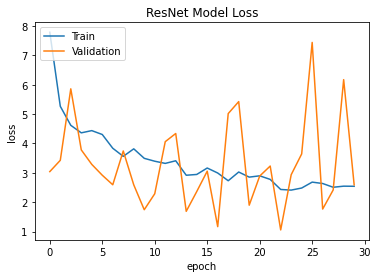

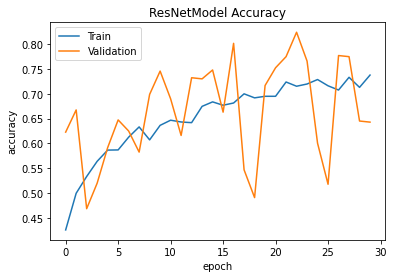

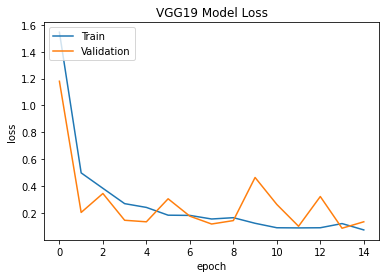

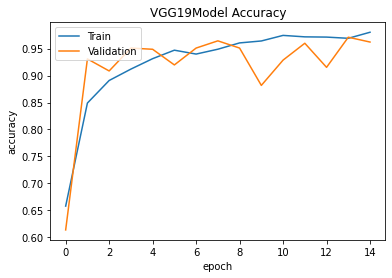

In [50]:
# plot(m_h,'mobileNet')
plot(r_h,'ResNet')
# plot(m_h,'DenseNet')
plot(v_h,'VGG19')

In [ ]:
# import matplotlib.pyplot as plt

# # summarize history for accuracy
# plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# # summarize history for loss
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()


In [ ]:
# # Random Check
# path = "/content/test/Pro/WBC-Malignant-Pro-005.jpg"
# from keras.preprocessing.image import load_img, img_to_array
# img = load_img(path, target_size=(224,224))

# input_arr = img_to_array(img)/255
# # input_arr = preprocess_input(input_arr)/255
# input_arr = np.array([input_arr])
# print(input_arr.shape)

# pred = np.argmax(model.predict(input_arr))
# print(pred)
# # input_arr = np.expand_dims(input_arr, axis=0)

# # To display the image
# plt.imshow(input_arr[0])
# plt.title("Input image")
# plt.show()